
## Thinkful Data Science Unit 1 Capstone -- Kristofer Schobert

# The Rate of Suicides Following the Collapse of the Soviet Union


In this report, we will be investigating a dataset containing information on the number of suicides in a given country per year. This dataset was uploaded on kaggle.com by the user, Szamil. https://www.kaggle.com/szamil/who-suicide-statistics


## Exploratory Analysis

Our goal is to implement A/B testing. Perhaps, a distressing event will affect the rate of suicides of a certain country. We could then compare the rate of suicides of the affected country to that of a stable country before and soon after the event.

First, we will explore this data to see if we do not find any interesting phenomena.

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot as plt
from scipy import stats

df = pd.read_csv('suicide.csv')
df.head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


Let's investigate a few countries to see if we notice any change in the number of suicides per 100,000 people for that country. 

NOTE: Since we are interested in the entire population of a country, we will group both genders and all ages of people together.

In [45]:
#dropping columns ultimately unrelated to our experiment
df = df.drop(columns=['suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'])

#create an aggregated dataframe with all the age and gender information combined.
df = df.groupby(['country', 'year']).sum()
df = df.reset_index()
df['suicides_per_100k'] = 100000*df.suicides_no/df.population


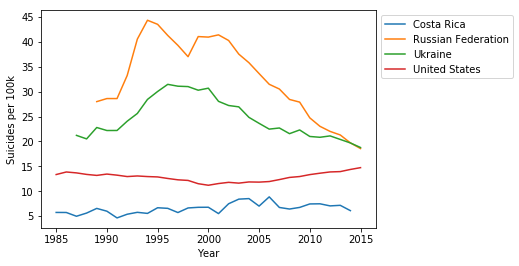

In [46]:
counties_to_explore = ['Russian Federation', 'United States', 'Costa Rica', 'Ukraine']
plot_explore = sns.lineplot(data=df[df.country.isin(counties_to_explore)], 
             x='year', y='suicides_per_100k', hue='country')
plot_explore.set(ylabel='Suicides per 100k', xlabel='Year')
handles, labels = plot_explore.get_legend_handles_labels()
plot_explore.legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(1, 1))
plt.show()

One trend certainly jumps out. Both Russia and Ukraine have a large increase in suicides beginning in the early 1990s that then tapering off around 2005 or 2010. What happened to these two countries in the early 1990s? The Collapse of the Soviet Union. Let's investigate this further by creating an experiment.

## The Problem

The collapse of government will often leave its citizens in turmoil. As we have seen from our exploratory analysis, it seems the collapse of the Soviet Union put enough stress on its citizens to increase their frequency of suicide significantly. Let's investigate this further. If our hypothesis that government collapse results in more suicides is not rejected, we can urge our stable governments to send aid to nations that collapse in the future.

## Hypothesis

We hypothesize that the collapse of the Soviet Union lead to an increased frequency of suicides for the countries that were part of the union. 

## Method for Testing the Hypothesis

We will group all the Soviet Union countries that we have data on into one group and all the other countries into another group. For each year in our dataset, we will add up the total number of suicides for each group then divide by the total population of each group. We will then multiply that fraction by 100,000 to obtain the number of suicides per 100,000 people. Let's refer to this metric as the suicide frequency. For each year, we will have two suicide frequencies: one for all the countries of the Soviet Union and one for all the other countries. 

Comparing Soviet countries to all the non-Soviet countries is a reasonable choice. The figure titled "Suicide Frequency for Soviet Union Population vs The Population of Other Countries" shows that the non-Soviet countries were relatively stable during the years included in our dataset. 

We will divide the suicide frequency of the Soviet Union countries by the suicide frequency of the Non-Soviet countries for a given year. This will give us the ratio that gives the number of Soviet Union suicides for one suicide of a Non-Soviet country. Let's refer to this metric as the suicide ratio. 

We will choose a year to designate the start of the Soviet Union's hardship following its collapse and a year to be the end of the hardship. The date of the collapse is December 25, 1991. Thus, 1992 will be the first year of the hardship period. The end is a bit more ambiguous. The most populated country of the Soviet Union, Russia, had a period of great economic growth following the Russian Financial Crisis of 1998. Thus, we will use 1999 as the start of more stable times for the Soviet Union countries. This is a relatively conservative end date for the period of hardship. Russia was only beginning to become stable in 1999. Their GDP returned to a more normal level around the year 2008. Still, we will use 1998 as the last year of the hardship period, and 1999 as the first year of stable times for the Soviet countries.

Finally, we will compare the suicide ratios for years within the hardship period to the suicide ratios for the years outside the hardship period. We will run a t-test and a Mann-Whitney-U test to find the probability that the mean suicide ratio during the hardship period is greater than the mean suicide ratio during years not included in the hardship period. Our null hypothesis will be that both sample distributions have the same mean suicide ratio. We will reject this null hypothesis if both of our significance tests yield a p-value of less than 0.05.

Sources: 

https://en.wikipedia.org/wiki/Dissolution_of_the_Soviet_Union

https://en.wikipedia.org/wiki/Economy_of_Russia#Economic_history

In [47]:
#Let's create a column to signify if a country is a member of the Soviet Union
su_countries = ['Armenia', 
#'Moldova',...no data
'Estonia',
'Latvia',
'Lithuania',
'Georgia',
'Azerbaijan',
#'Tajikistan',...no data
'Kyrgyzstan',
'Belarus',
'Uzbekistan',
'Turkmenistan',                
'Ukraine',
'Kazakhstan',
'Russian Federation']


df['soviet_union'] = np.where(df.country.isin(su_countries), 1, 0)

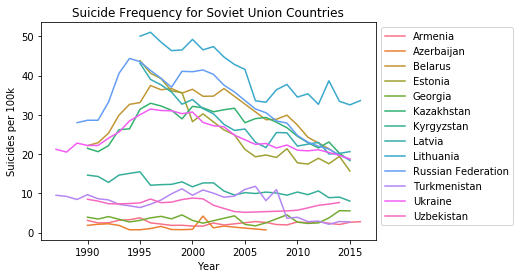

In [48]:
su_countries_plot = sns.lineplot(data=df[df.soviet_union == 1], 
             x='year', y='suicides_per_100k', hue='country')
su_countries_plot.set(ylabel='Suicides per 100k', xlabel='Year', title='Suicide Frequency for Soviet Union Countries')
handles, labels = su_countries_plot.get_legend_handles_labels()
su_countries_plot.legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(1, 1))
 
plt.show()

In the figure above, we see that roughly half of the Soviet countries have a noticeable increase in suicide frequency during the hardship period. With the more populated countries in this group, we will likely see a noticeable increase in the suicide frequency for the entire population of Soviet countries during this hardship period. 

In [50]:
df2 = df.groupby(['soviet_union', 'year']).sum().reset_index()
df2['suicides_per_100k'] = 100000*df2.suicides_no/df2.population


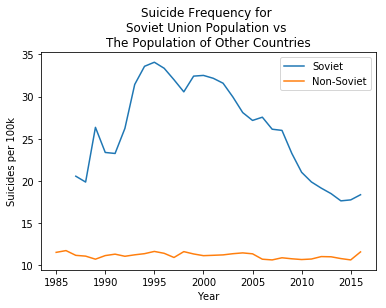

In [51]:
summed_soviet_vs_other_plot = sns.lineplot(data=df2, x='year', y='suicides_per_100k', hue='soviet_union', hue_order=[1,0])
summed_soviet_vs_other_plot.set(ylabel='Suicides per 100k', xlabel='Year', title='Suicide Frequency for \nSoviet Union Population vs \nThe Population of Other Countries')
handles, labels = summed_soviet_vs_other_plot.get_legend_handles_labels()
summed_soviet_vs_other_plot.legend(handles=handles[1:], labels=['Soviet','Non-Soviet'], bbox_to_anchor=(1, 1))
plt.show()

Indeed, there is an obvious increase in suicides for Soviet countries during this hardship period of 1992 to 1998. We also see that our chosen end year for the hardship period is certainly conservative. Upon viewing this figure, it seems that the Soviet suicide frequency did not return to its average value before the collapse until roughly 2008, the end of Russia's period of growth. Also, the relatively constant suicide frequency of all the non-Soviet countries supports our decision to compare Soviet countries to non-Soviet countries. As a whole, the rest of the world seems to be relatively stable in terms of suicide frequencies during the years we are investigating. 

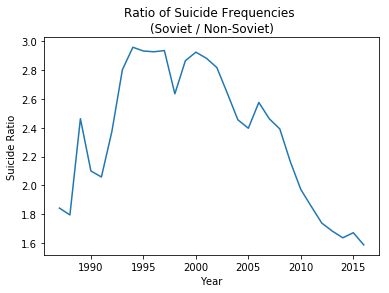

In [56]:
df3 = df2[df2.soviet_union == 1].set_index('year')/df2[df2.soviet_union == 0].set_index('year')
df3 = df3.reset_index()
suicide_ratio_plot = sns.lineplot(data=df3, 
             x='year', y='suicides_per_100k')
suicide_ratio_plot.set(ylabel='Suicide Ratio', 
                       xlabel='Year', title='Ratio of Suicide Frequencies \n(Soviet / Non-Soviet)')
plt.show()

This figure shows the suicide ratio for each year. This plot's shape is very similar to the shape of the suicide frequency plot for the Soviet countries. This is becuase the suicide frequency of the Non-Soviet countries was roughly the same each year.

Now we will run our t-test and Mann-Whitney-U test. The suicide ratios from 1992 to 1998, the hardship period, will be compared to the suicide ratios outside of the hardship period. 

NOTE: The p-value resulting from scipy's t-test will be twice our p-value because we are testing to see if the mean suicide ratio during the hardship period is _greater_ than the alternative mean suicide ratio. Scipy's t-test only calculates a two-sided t-test, when we are conducting a one-sided t-test. Thus, we will divide our p-value by two.

In [55]:
collapse_start_year = 1992
collapse_end_year = 1998

#We will not include 1985 or 1986 because we have no data on any Soviet countries for those years.

#1987 up to and including 1991 plus 2010 and on
suicide_ratio_non_collapse = df3.loc[(df3.year < collapse_start_year) | (df3.year > collapse_end_year)]['suicides_per_100k'][2:]
#print(suicide_ratio_non_collapse)
suicide_ratio_collapse = df3.loc[(df3.year >= collapse_start_year) & (df3.year <= collapse_end_year)]['suicides_per_100k']
#print(suicide_ratio_collapse)
print(scipy.stats.ttest_ind(suicide_ratio_non_collapse, suicide_ratio_collapse, axis=0, equal_var=False))
print(scipy.stats.mannwhitneyu(suicide_ratio_non_collapse, suicide_ratio_collapse, use_continuity=True, alternative='less'))

Ttest_indResult(statistic=-4.660622862100072, pvalue=0.00012709896126221655)
MannwhitneyuResult(statistic=20.0, pvalue=0.0016303063201702527)


## Conclusion

Our t-test's p-value is 0.0000635, and our Mann-Whitney-U test's p-value is 0.00163. Both of these tests resulted in a p-value less than our threshold of 0.05. Thus, we reject the null hypothesis that the collapse of the Soviet Union had no effect on the rate of suicides for countries that were part of the Union.

The collapse of government brings extreme socioeconomic stress to its citizens. Through our analysis, we have shown that this effect is real and measurable. Suicide prevention aid should be readily available to citizens of recently collapsed governments for several years following the collapse. 

